In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("vahan/23-24.csv")
df.head()

,state,fuel,vehicle_category,23-24,22-23
0,AP,electric,2WIC,0,2.0
1,AP,electric,2WN,8727,29253.0
2,AP,electric,2WT,0,1.0
3,AP,electric,3WN,44,439.0
4,AP,electric,3WT,49,298.0


In [44]:
df['vehicle_category'].unique()

array(['2WIC', '2WN', '2WT', '3WN', '3WT', '4WIC', 'HGV', 'HMV', 'HPV',
       'LGV', 'LMV', 'LPV', 'MGV', 'MMV', 'MPV', 'OTH'], dtype=object)

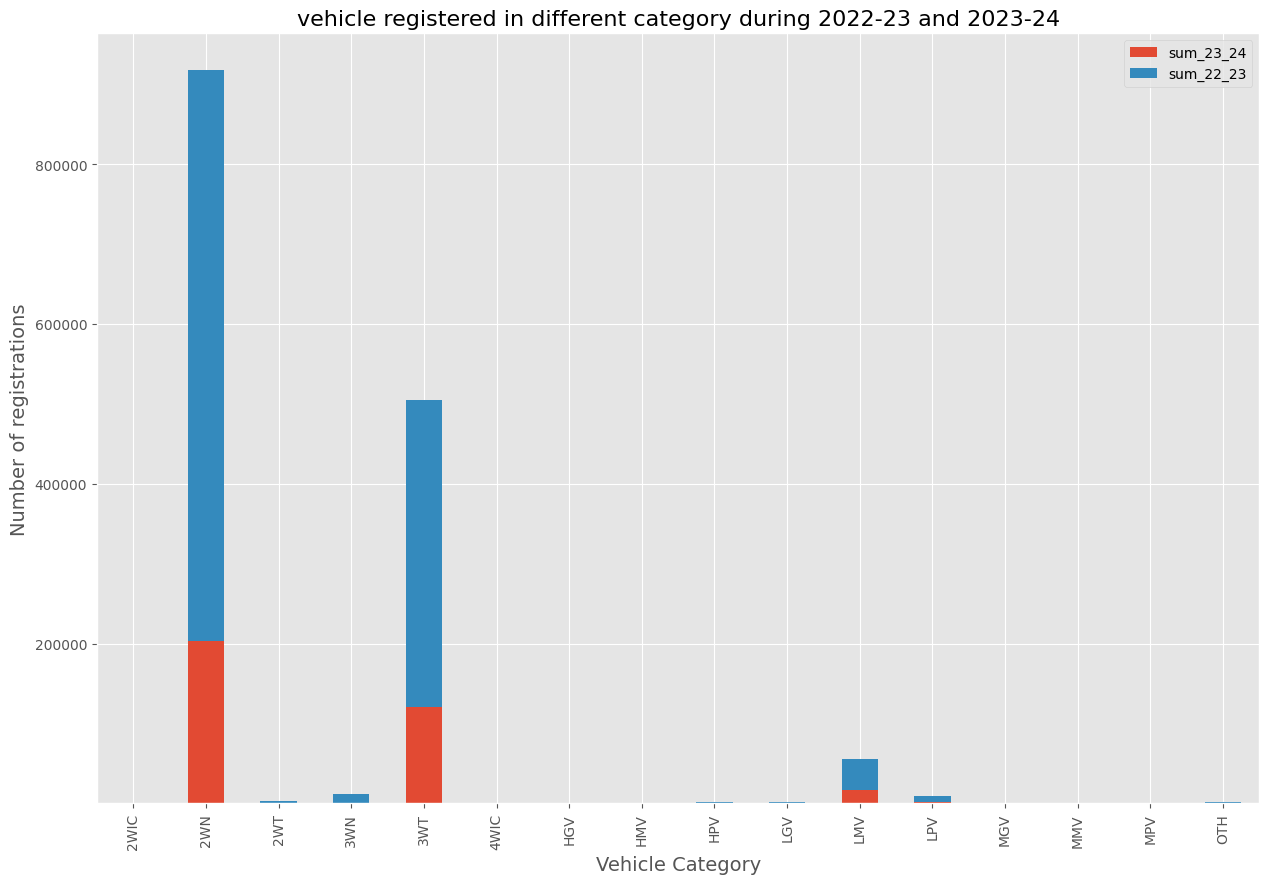

In [40]:
data = df.groupby(['vehicle_category']).agg(
     sum_23_24 = ('23-24','sum'),
     sum_22_23 = ('22-23','sum'),
     ).reset_index()

plt.style.use("ggplot")
data.set_index('vehicle_category').plot(kind='bar', stacked=True, figsize=(15,10))
plt.title("vehicle registered in different category during 2022-23 and 2023-24", size=16)
plt.xlabel("Vehicle Category", size=14)
plt.ylabel("Number of registrations", size=14)
plt.show()

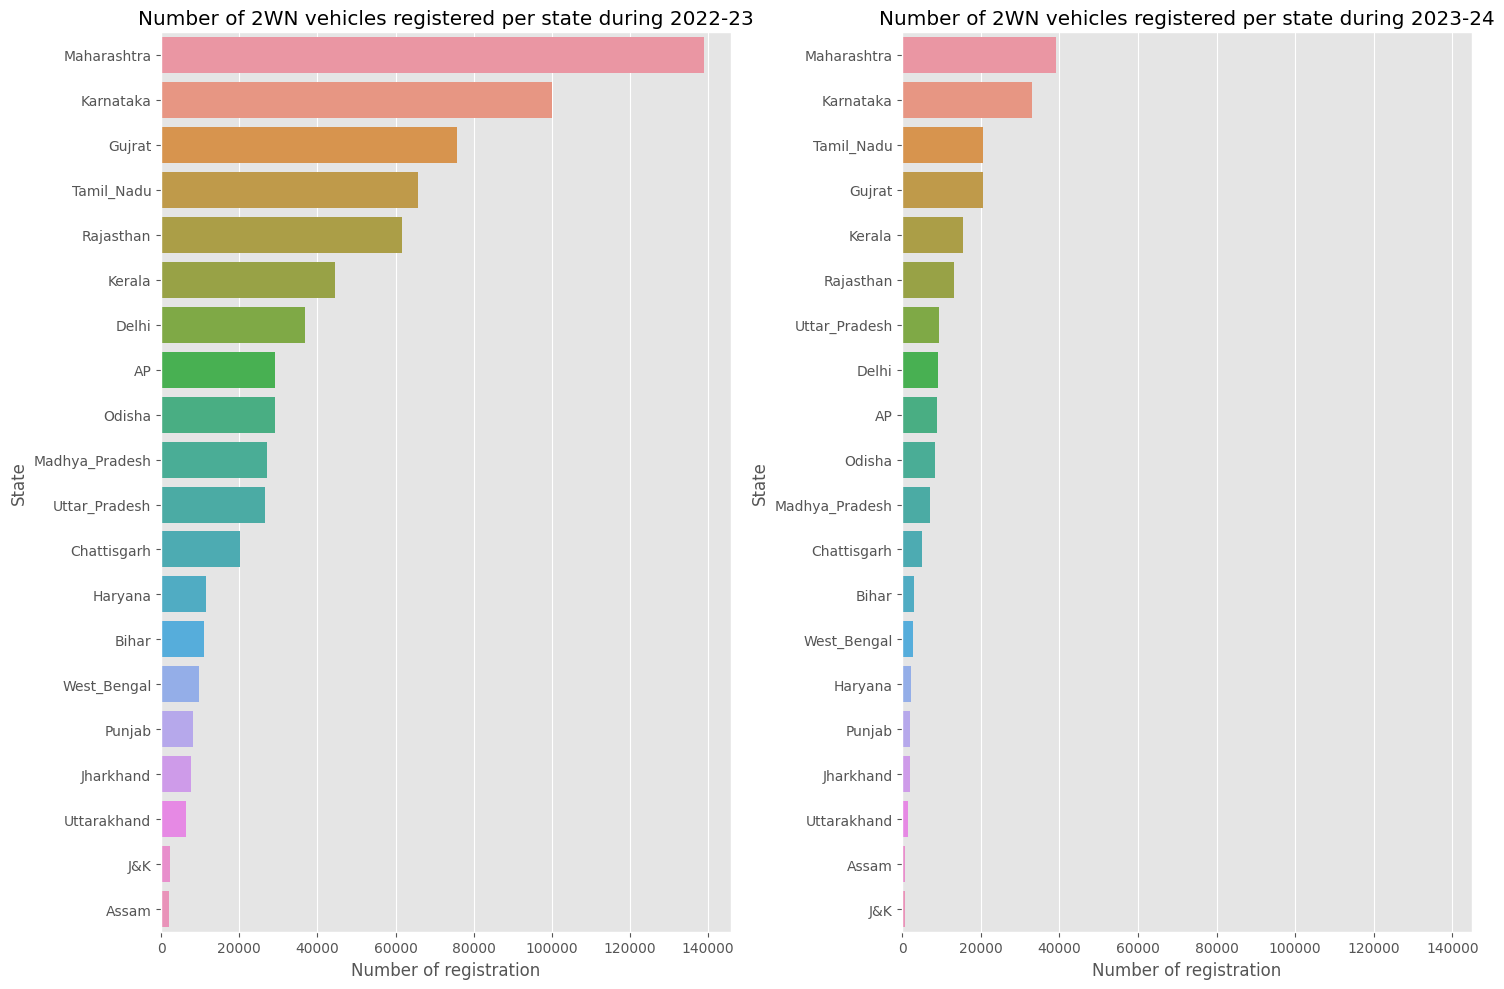

In [63]:
plt.style.use("ggplot")
fig, axes = plt.subplots(1, 2, figsize=(15,10))

sns.barplot(data = df[df['vehicle_category'] == '2WN'].sort_values(by=['22-23'], ascending=False), y='state', x='22-23', orient='h', ax=axes[0])
axes[0].set_title("Number of 2WN vehicles registered per state during 2022-23")
axes[0].set_xlabel("Number of registration")
axes[0].set_ylabel("State")

sns.barplot(data = df[df['vehicle_category'] == '2WN'].sort_values(by=['23-24'], ascending=False), y='state', x='23-24', orient='h', ax=axes[1])
axes[1].set_title("Number of 2WN vehicles registered per state during 2023-24")
axes[1].set_xlabel("Number of registration")
axes[1].set_ylabel("State")
axes[1].set_xlim(0, 145000)

plt.tight_layout()
plt.show()

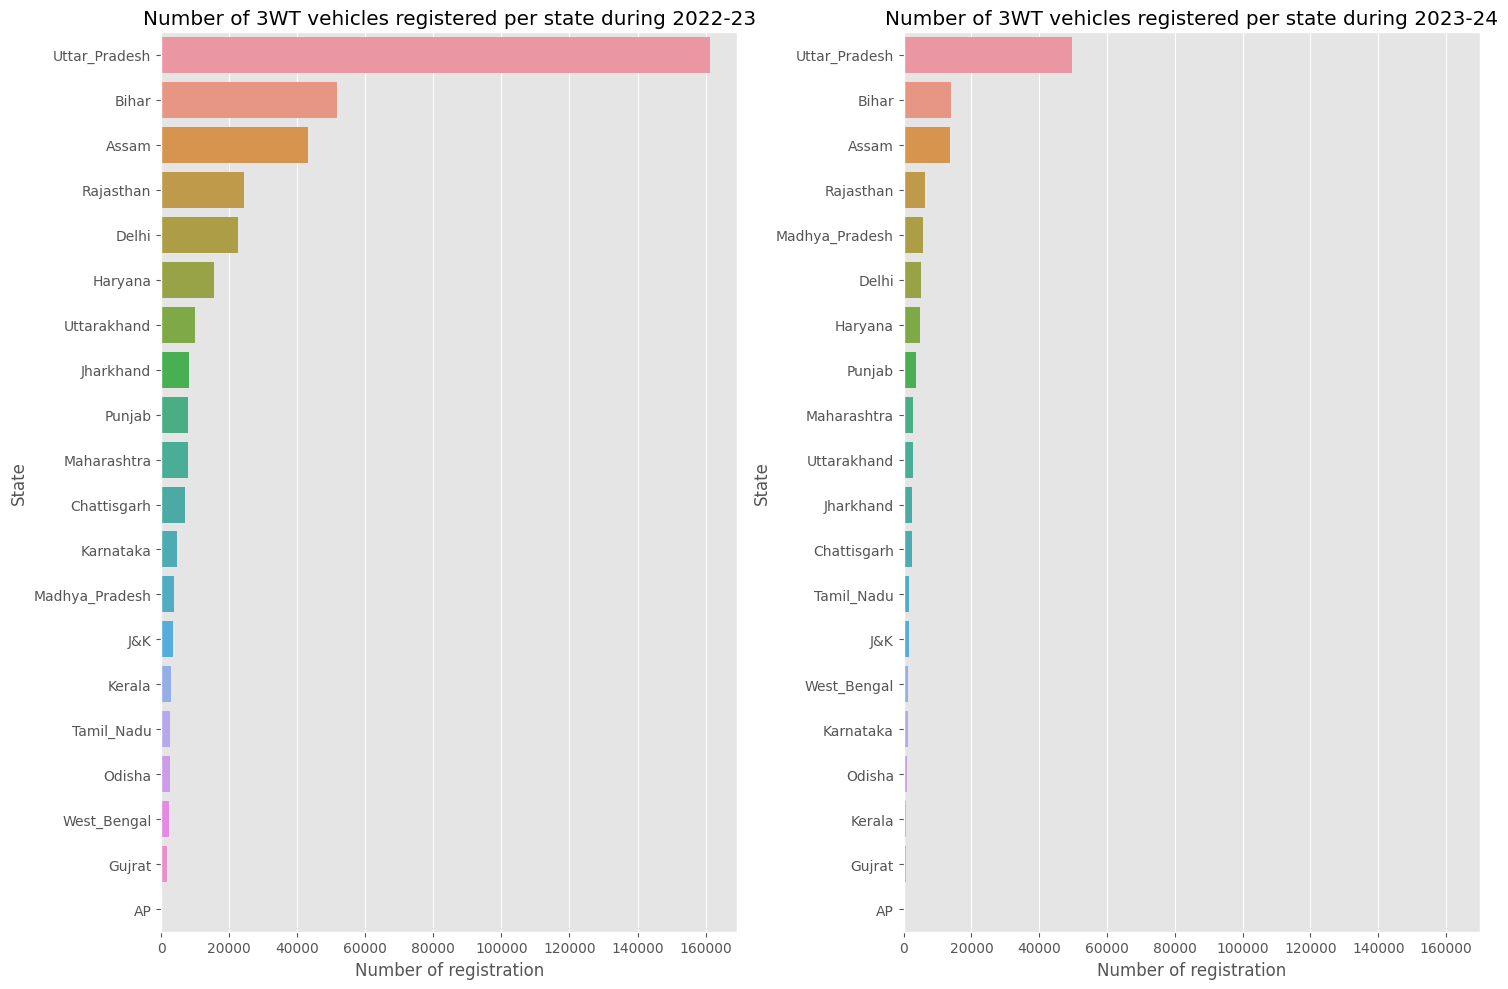

In [60]:
plt.style.use("ggplot")
fig, axes = plt.subplots(1, 2, figsize=(15,10))

sns.barplot(data = df[df['vehicle_category'] == '3WT'].sort_values(by=['22-23'], ascending=False), y='state', x='22-23', orient='h', ax=axes[0])
axes[0].set_title("Number of 3WT vehicles registered per state during 2022-23")
axes[0].set_xlabel("Number of registration")
axes[0].set_ylabel("State")

sns.barplot(data = df[df['vehicle_category'] == '3WT'].sort_values(by=['23-24'], ascending=False), y='state', x='23-24', orient='h', ax=axes[1])
axes[1].set_title("Number of 3WT vehicles registered per state during 2023-24")
axes[1].set_xlabel("Number of registration")
axes[1].set_ylabel("State")
axes[1].set_xlim(0,170000)

plt.tight_layout()
plt.show()

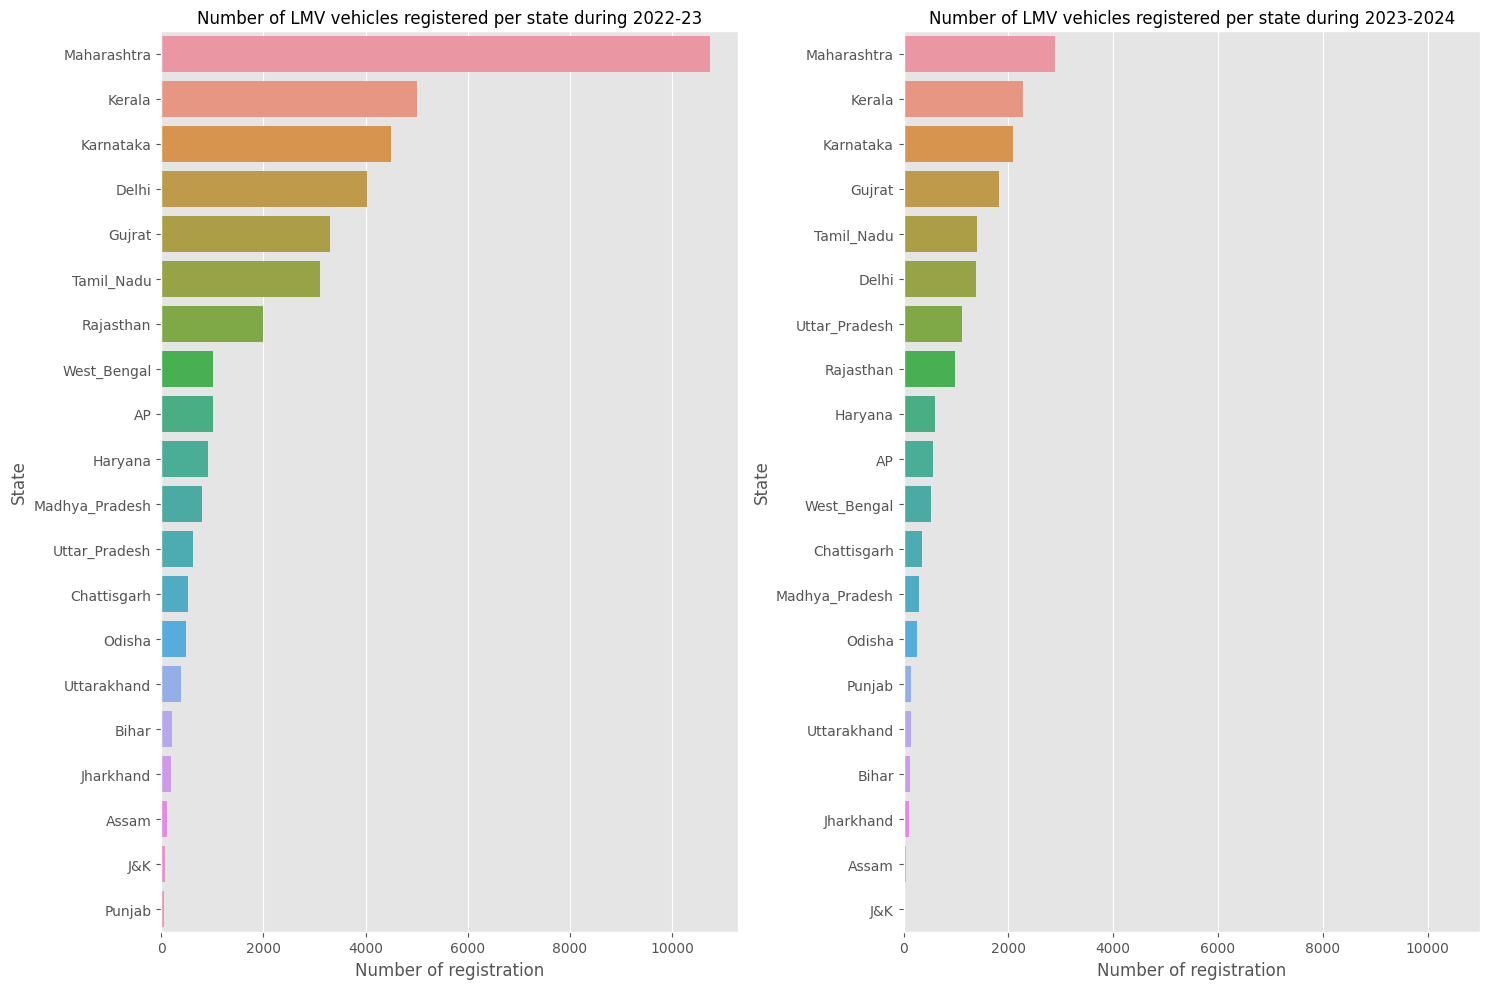

In [56]:
plt.style.use("ggplot")
fig, axes = plt.subplots(1, 2, figsize=(15,10))

sns.barplot(data = df[df['vehicle_category'] == 'LMV'].sort_values(by=['22-23'], ascending=False), y='state', x='22-23', orient='h',ax=axes[0])
axes[0].set_title("Number of LMV vehicles registered per state during 2022-23", size = 12)
axes[0].set_xlabel("Number of registration")
axes[0].set_ylabel("State")

sns.barplot(data = df[df['vehicle_category'] == 'LMV'].sort_values(by=['23-24'], ascending=False), y='state', x='23-24', orient='h',ax=axes[1])
axes[1].set_title("Number of LMV vehicles registered per state during 2023-2024", size = 12)
axes[1].set_xlabel("Number of registration")
axes[1].set_ylabel("State")
axes[1].set_xlim(0,11000)

plt.tight_layout()
plt.show()

In [104]:
gdp = pd.read_csv("nsdp_rbi/nsdp.csv")
gdp.head(5)

,state,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
0,Andaman and Nicobar Islands,89100,98777,111087,126344,137064,153904,178709,204254,218649,-
1,Andhra Pradesh,69000,74687,82870,93903,108002,120676,138299,152286,168480,170215
2,Arunachal Pradesh,73540,82626,94135,114789,116985,124129,138836,154652,169742,-
3,Assam,41142,44599,49734,52895,60817,66330,75151,81034,86801,-
4,Bihar,21750,24487,26948,28671,30404,34045,36850,40715,45071,46292


In [82]:
r = [1,3,4,6,7,9,10,12,13,14,15,16,17,22,24,25,27,30,31,32] # states for consideration
gdp.iloc[r]

,state,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21
1,Andhra Pradesh,69000,74687,82870,93903,108002,120676,138299,152286,168480,170215
3,Assam,41142,44599,49734,52895,60817,66330,75151,81034,86801,-
4,Bihar,21750,24487,26948,28671,30404,34045,36850,40715,45071,46292
6,Chhattisgarh,55177,60849,69880,72936,72991,83285,89690,98254,105089,104943
7,Delhi,185001,205568,227900,247209,270261,295558,318323,344350,376221,354004
9,Gujarat,87481,102826,113139,127017,139254,156295,176961,197457,213936,-
10,Haryana,106085,121269,137770,147382,164963,184982,210592,226409,247628,239535
12,Jammu and Kashmir,53173,56828,61108,61211,73215,76634,84471,95448,102789,104860
13,Jharkhand,41254,47360,50006,57301,52754,60018,67484,75421,77739,75587
14,Karnataka,90263,102319,118829,130024,148108,169898,186405,205697,223175,226796


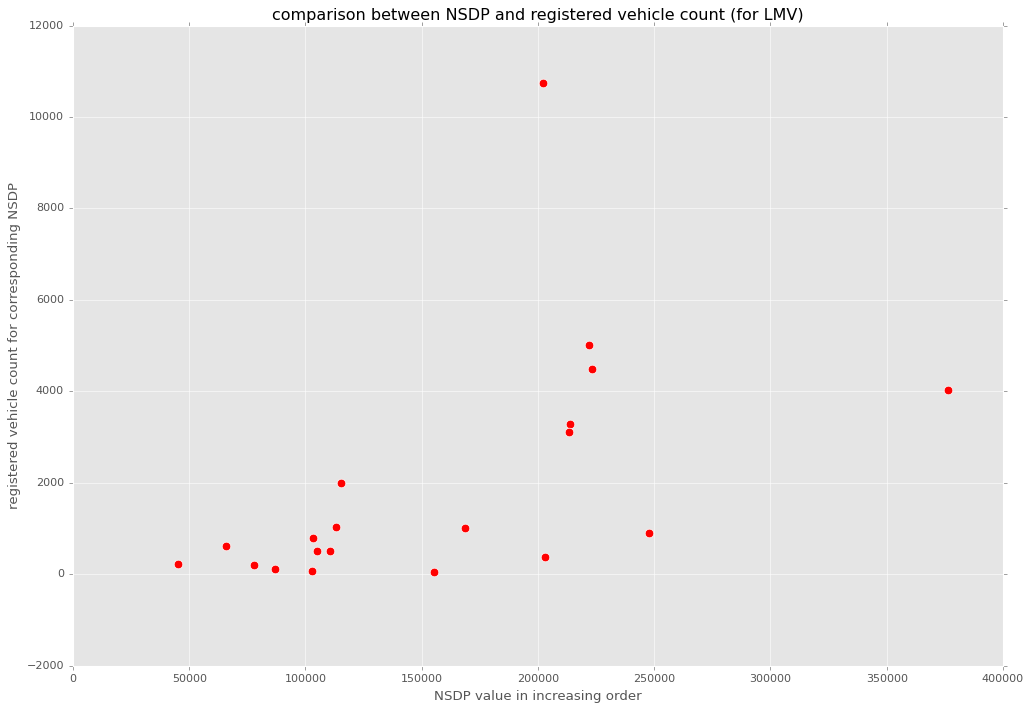

In [130]:
regs = df[df['vehicle_category'] == 'LMV'].sort_values(by=['state'])['22-23'] # list containing registered counts for these states
nsdp = gdp.iloc[r]['2019-20']

plt.subplots(figsize=(15,10))
sns.scatterplot(y = regs.values, x = nsdp.values, color='r', s=60)
plt.title("comparison between NSDP and registered vehicle count (for LMV)")
plt.xlabel("NSDP value in increasing order")
plt.ylabel("registered vehicle count for corresponding NSDP")
plt.show()

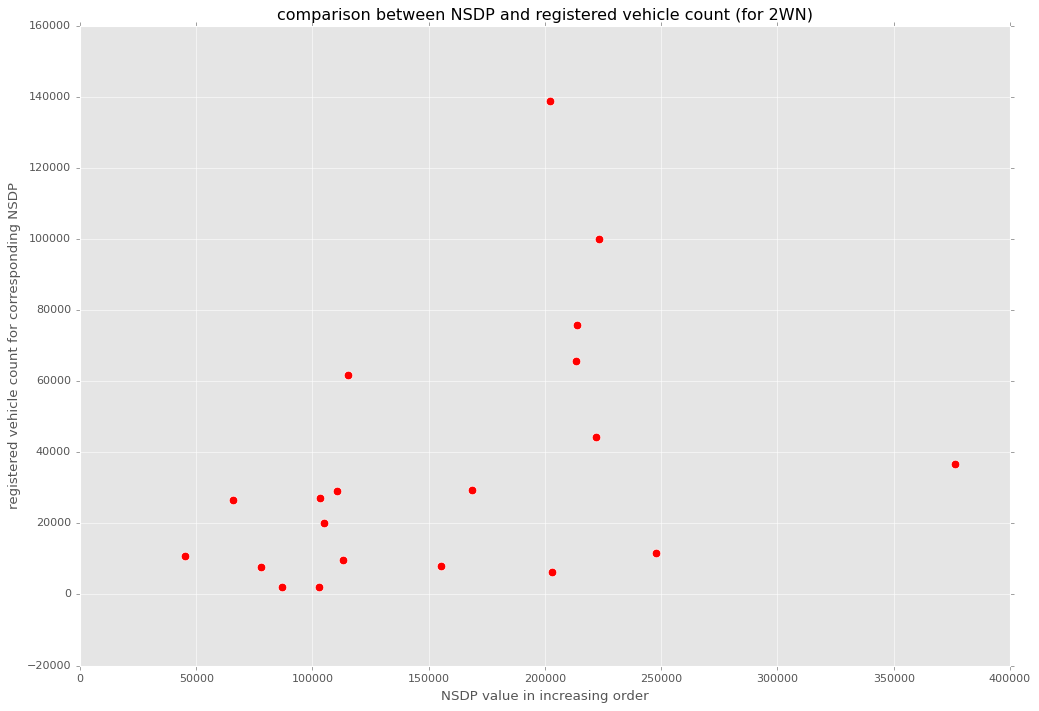

In [129]:
regs = df[df['vehicle_category'] == '2WN'].sort_values(by=['state'])['22-23'] # list containing registered counts for these states
nsdp = gdp.iloc[r]['2019-20']

plt.style.use("ggplot")
plt.subplots(figsize=(15,10))
sns.scatterplot(y = regs.values, x = nsdp.values, color='r', s=60)
plt.title("comparison between NSDP and registered vehicle count (for 2WN)")
plt.xlabel("NSDP value in increasing order")
plt.ylabel("registered vehicle count for corresponding NSDP")
plt.show()

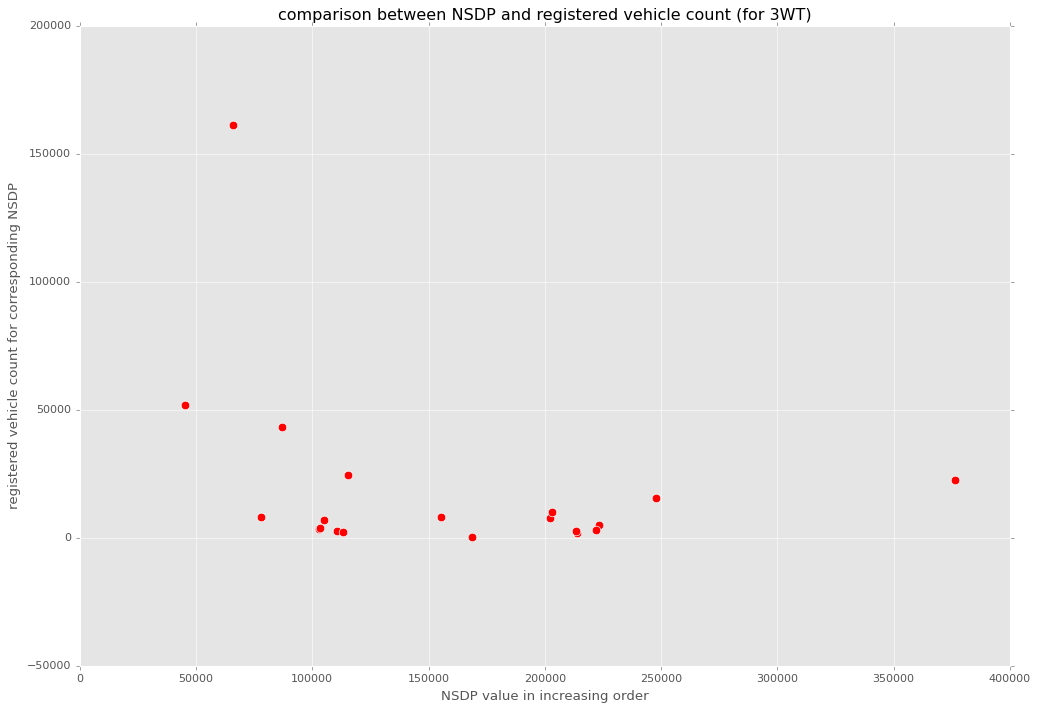

In [131]:
regs = df[df['vehicle_category'] == '3WT'].sort_values(by=['state'])['22-23'] # list containing registered counts for these states
nsdp = gdp.iloc[r]['2019-20']

plt.subplots(figsize=(15,10))
sns.scatterplot(y = regs.values, x = nsdp.values, color='r', s=60)
plt.title("comparison between NSDP and registered vehicle count (for 3WT)")
plt.xlabel("NSDP value in increasing order")
plt.ylabel("registered vehicle count for corresponding NSDP")
plt.show()

In [95]:
nsdp

1     168480
3      86801
4      45071
6     105089
7     376221
9     213936
10    247628
12    102789
13     77739
14    223175
15    221904
16    103288
17    202130
22    110434
24    155491
25    115492
27    213396
30     65704
31    202895
32    113163
Name: 2019-20, dtype: int64

In [96]:
regs

10      569
26       53
42      127
58      352
74     1386
90     1825
106     589
138      33
122      93
154    2085
170    2273
202     292
186    2897
218     257
234     149
250     983
266    1393
298    1114
282     142
314     525
Name: 23-24, dtype: int64